## Introducción a Pandas
En programación 1, aprendimos a abrir archivos csv usando el paquete `csv`. 

Hagamos un repaso 😀

### Paquete CSV

Comencemos leyendo el archivo con csv. Como podrán recordar, extraer información puede ser un poco tedioso ya que para poder obtener todos los valores en una columna, tenemos que recorrer todas las filas del archivo csv. 

En este caso vamos a recolectar los precios y los precios clasificados por barrios

In [ ]:
lista_precios = []
precio_por_barrio = {}

with open('listings.csv') as File:
    next(File)
    reader = csv.reader(File, delimiter=',')
    for fila in reader:
        precio = float(fila[9].replace('$', '').replace(',',''))
        lista_precios.append(precio)      
        #por barrio
        barrio = fila[5] # neighbourhood
        if barrio in precio_por_barrio:
            precio_por_barrio[barrio].append(precio)
        else:
            precio_por_barrio[barrio] = [precio]

En el código de arriba generamos una lista con todos los precios que aparecen en el archivo listing.csv y un diccionario donde las claves son los barrios y los valores son todos los precios de ese barrio. A continuación hacemos una breve exploración de esos datos

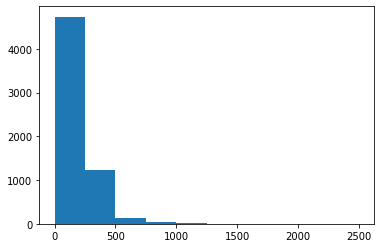

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lista_precios);

In [ ]:
sum(lista_precios)/len(lista_precios)

198.01960149036125

In [ ]:
precio_por_barrio.keys()

dict_keys(['IJburg - Zeeburgereiland', 'Noord-Oost', 'Noord-West', 'Gaasperdam - Driemond', 'Watergraafsmeer', 'Bijlmer-Centrum', 'Geuzenveld - Slotermeer', 'Westerpark', 'Buitenveldert - Zuidas', 'Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'Zuid', 'Oud-Oost', 'De Pijp - Rivierenbuurt', 'Slotervaart', 'De Baarsjes - Oud-West', 'Bos en Lommer', 'Oud-Noord', 'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Oost'])

In [ ]:
# Calculamos el precio promedio en el barrio Bijlmer-Centrum
sum(precio_por_barrio[c])/len(precio_por_barrio['Bijlmer-Centrum'])

142.5731707317073

### Paquete Pandas 💗🐼💗🐼💗🐼💗🐼💗

El paquete pandas es muy utilizado en el análisis de datos para leer y manipular archivos de diferentes tipos, en particular el csv. 

* Uno de los beneficios más importantes de usar pandas es que nos permite acceder a los datos como si estos fueran una tabla, es decir, puedo acceder a las filas o columnas sin importar cuál es el archivo base. 

* Además, nos permite tener los datos asociados a su índice, algo que por ahora no tiene mucho sentido pero lo tendrá más adelante

* Y los datos se ven muy lindos 💣

Según sus creadores pandas es:

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

La documentación de pandas la encuentran acá https://pandas.pydata.org/docs/

In [ ]:
import pandas as pd #casi todo el mundo importa pandas así

In [ ]:
data = pd.read_csv('listings.csv')

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


Vamos a ver cómo calculamos el precio promedio de los listings? y por barrio?

In [ ]:
data['price'].mean()

198.01960149036125

In [ ]:
data[data['neighbourhood']=='Bijlmer-Centrum']['price'].mean()

142.5731707317073

### Beneficios ?
Hagamos una lista de los beneficios que vemos a simple vista si usamos pandas comparado con CSV

### 🐼 Conceptos Básicos 🐼

- Las estructuras de datos más usadas en pandas son los Dataframes y las Series 
- Los DataFrames pueden ser pensados como una tabla y las Series como las columnas de la tabla

In [ ]:
#Veamos como es el tipo de datos de DataFrame
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Veamos como es el tipo de datos de Series
type(data['price'])

pandas.core.series.Series

In [ ]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


In [ ]:
data['price'].head()

0     88
1    105
2    152
3     87
4    160
Name: price, dtype: int64

### Juguemos un rato con pandas y exploremos lo siguiente:
- data.head(): miramos los primeros 10 registros
- data.head(2): miramos los primeros 2 registros
- data.tail(): miramos los últimos 10 registros
- data.price.min() o data['price'].min()
- data.price.max() o data['price'].max()
- data.price.describe(): descripción básica de los datos en cuestión
 
 Manos a la obra!!!

### Concepto de índice
Como probablemente ya vieron en la materia de base de datos, los índices son un elemento muy importantes cuando almacenamos los datos. 
Es lo que nos permite referirnos a un dato de forma únivoca. Para determinar el índice de un dataset, vamos a buscar una variable/columna/característica única, es decir, que no tenga repetidos. 

Por ejemplo, si en nuestros datos del listing queremos identificar una publicación en particular, como lo haríamos? Con el precio? Con el nombre de la publicación? Probablemente no! Lo que haríamos es referirnos a un listing por su id. 

Una característica muy importante de los DFs y Series es que siempre tienen un índice. Cuando pandas abre un archivo, automáticamente genera un header, los nombres de las columnas, y genera un índice automáticamente que va de 0 a la longitud del archivo -1

En nuestros datos, vemos que si bien pandas genera un índice automático, no es el índice que queremos usar, el id del listing. Para poder cambiarlo, vamos a usar el método df.set_index('nuevo_indice', inplace = True)


In [ ]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


In [ ]:
data.set_index('id', inplace = True) #cambia el índice inplace
data.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


### Indexar 
Pandas nos permite acceder a la información dentro de sus DFs y Series mediante sus índices con los atributos .loc y .iloc. `loc` nos permite acceder a los índices por su valor y `iloc` por su posición. 
Vamos a poder acceder a un índice o a varios. Y también vamos a poder incluir las columnas

In [ ]:
data.loc[35815036]

name                              Vrijstaand vakantiehuis, privé tuin aan het water
host_id                                                                   269425139
host_name                                                                     Lydia
neighbourhood_group                                                             NaN
neighbourhood                                                            Noord-Oost
latitude                                                                   52.42419
longitude                                                                   4.95689
room_type                                                           Entire home/apt
price                                                                           105
minimum_nights                                                                    3
number_of_reviews                                                                95
last_review                                                              202

In [ ]:
data.loc[[23726706, 35815036]]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN


In [ ]:
data.loc[[23726706, 35815036], ['price', 'minimum_nights']]

,price,minimum_nights
id,,
23726706,88,2
35815036,105,3


### Crear un DF
Para cerrar veamos una forma rápida de crear un DataFrame, aunque hay muchísimas! 

In [ ]:
df = pd.DataFrame(index = [1,2,3,4], columns = ['col1', 'col2'])

In [ ]:
df

,col1,col2
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Como podemos observar, se genera un DF vacío con todos los valores nulos

### Ejercicios
Descargar el archivo de consumo de eléctrico por sector manufacturero (series originales) del siguiente [link](https://datos.gob.ar/dataset/produccion-consumo-electrico-por-sectores-manufactureros)

1. Visualizar los primeros 3 registros y los últimos 15
2. Asignarle un índice al DF
3. Calcular el consumo promedio para la industria de bebidas
4. Calcular el consumo máximo de la industria de minerales no metálicos
5. Calcular el consumo mínimo de la industria de la molienda de cereáles y oleainosas
6. Calcular el consumo promedio de todas las industrias
7. Buscar cúal fue la industria que más consumio en todo el período disponible y cuál fue el consumo